# Início do projeto

Objetivo: Classificar esses potenciais clientes para saber se eles são potenciais a deixarem a empresa ou não

In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv('/content/drive/MyDrive/projetos/projetos-classificacao/Customer-Churn.csv')
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [5]:
dados.shape

(7043, 18)

------------------------------------------------------
Temos variáveis categóricas e númericas.

Categóricas: Representam agrupamentos por características em comum (exemplo booleanos) e valores qualitativos

Conjugue e Dependentes são exemplos de variáveis categóricas.

Numéricas: Representam Medida ou conjunto infinito de valores 

MesesDeContrato e ContaMensal

------------------------------------------------------

------------------------------------------------------
Necessário saber esses tipos de variáveis, pois sabemos que a máquina aprende por números, por isso precisamos transforma-las na etapa de processamento, em números, pois dessa forma o algoritmo conseguirá classificar

------------------------------------------------------

In [6]:
# Transformação de forma manual

traducao_dic = {
    'Sim' : 1,
    'Nao' : 0
}

dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [7]:
# Transformação de forma automatizada, pela função get_dummies

dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                                         axis = 1))
# Esse drop foi chamado dentro do parâmetro da função, apenas porque já convertemos manualmente, no passo anterior
# essas colunas de categórica para as flags, portanto não precisamos realizar essa conversão novamente para essas colunas

dados_final = pd.concat([dadosmodificados, dummie_dados], axis = 1)


In [8]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [9]:
pd.set_option('display.max_columns', 39)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


# Técnica para balancear o Target em relação a sua quantidade

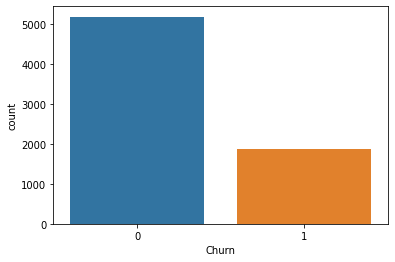

In [10]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

Analisando o gráfico, podemos perceber que nossa variável está desbalanceada e precisamos tratar isso. Para realizar o balanceamento dos dados, utilizaremos uma técnica chamada de Oversampling, que consiste em realizar a criação de novas observações da classe quando há menos amostras, tendo como objetivo igualar a proporção entre as categorias.

Uma das técnicas de oversampling muito utilizada é a SMOTE. Sua ideia consiste em criar observações intermediárias entre os dados que estão próximos. Por exemplo, se minutos totais por dia são 129.1 e 146.3, então será criada uma amostra com os minutos totais por dia com 137.7. Lembrando que não é necessariamente a média entre as amostras.


In [11]:
#  Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [12]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [13]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,0,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


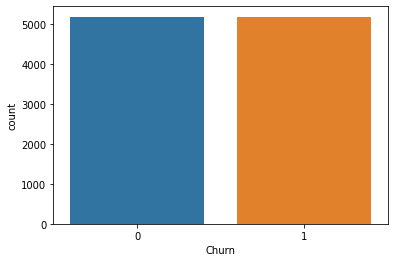

In [14]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

# Continuação do Problema

In [15]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

Agora temos um cliente (Maria) em que temos as caraterísticas dela, os produtos, as Features e queremos saber se o Churn dela é Sim ou Não

In [16]:
# Divisão das Features e Target

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [17]:
from sklearn.preprocessing import StandardScaler

Muito Importante utilizar essa função de normalização de distância, visto que o KNN se trata de um algoritmo que utiliza as disâncias entre os vizinhos mais próximos para classificar, portanto a distância interfere diretamente

In [18]:
norm = StandardScaler()

X_normaizado = norm.fit_transform(X)
X_normaizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

In [19]:
X_normaizado[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.8149851 , -0.41334384,
       -1.10768354, -1.32176205, -0.88482108,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
       -0.44617598, -0.64211419,  0.87997069, -0.44617598, -0.52426638,
        1.18643645, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78992399, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30292044, -0.47943196, -0.43617215])

In [20]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.8149851 , -0.41334384,
        -1.14934709, -0.97235471,  1.13017199, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
         2.24126814, -0.64211419, -1.13640148,  2.24126814, -0.52426638,
         1.18643645, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26594459, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76750657, -0.47943196,  2.29267273]])

Calculando a distância pelo método Euclidiano, de forma "Manual"

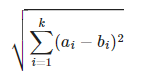

In [21]:
import numpy as np

In [22]:
a = Xmaria_normalizado

In [23]:
b = X_normaizado[0]

In [24]:
# 1 - Começa Subtraindo
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166355,  0.34940734,  2.01499307, -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01637218,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03436608,  0.        ,
         2.05586858,  0.        , -2.09323857,  2.80145225,  0.        ,
        -2.07042701,  0.        ,  2.72884488]])

In [25]:
# 2 - depois realiza a exponenciação
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73585140e-03, 1.22085486e-01, 4.06019707e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06575675e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13864535e+00, 0.00000000e+00, 4.22659561e+00, 0.00000000e+00,
        4.38164773e+00, 7.84813473e+00, 0.00000000e+00, 4.28666801e+00,
        0.00000000e+00, 7.44659439e+00]])

In [26]:
# 3 - A soma
np.sum(np.square(a-b))

91.70603225977928

In [27]:
# 4 - Então é tirada a raiz e temos a distância
np.sqrt(84.07574038273466)

9.169282435541762

# Implementando o modelo KNeighborsClassifier

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normaizado, y, test_size = 0.3, random_state = 123)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(metric = 'euclidean')

In [32]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [33]:
predito_knn = knn.predict(X_teste)

In [34]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

Treinamento e Teste:

In [35]:
X_treino

array([[-0.79024667, -0.52756038, -3.06083934, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       ...,
       [ 1.26542767,  1.89551764,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [ 1.26542767,  1.89551764,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215]])

In [36]:
y_treino

4831    0
5077    0
9023    1
4424    1
5236    0
       ..
9785    1
7763    1
5218    0
1346    1
3582    0
Name: Churn, Length: 7243, dtype: int64

In [37]:
median = np.median(X_treino)

# Implementando o Modelo de Bernoulli Naive Bayes

In [38]:
from sklearn.naive_bayes import BernoulliNB

In [39]:
# Criando o modelo 
bnb = BernoulliNB(binarize = median)

In [40]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=-0.4461759755508453)

In [41]:
predito_BNb = bnb.predict(X_teste)

In [42]:
predito_BNb

array([1, 0, 0, ..., 1, 1, 1])

# Implementando o Modelo de DecisionTree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state= 42)

In [45]:
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [46]:
# Utilizado para veficar a importância de cada atributo. Quanto menor, menos importante

dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

In [47]:
predito_ArvoreDecisao = dtc.predict(X_teste)

In [48]:
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

# Validação do Modelo

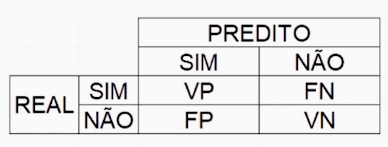

In [53]:
from sklearn.metrics import confusion_matrix

In [50]:
print(confusion_matrix(y_teste, predito_knn))

[[1241  328]
 [ 247 1289]]


In [51]:
print(confusion_matrix(y_teste, predito_BNb))

[[1048  521]
 [ 242 1294]]


In [52]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1249  320]
 [ 277 1259]]


# Acurácia

Métrica que calcula o quanto o modelo acertou e teve de desempenho

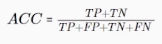

In [54]:
from sklearn.metrics import accuracy_score

In [56]:
# Modelo KNN
print(accuracy_score(y_teste, predito_knn))

0.8148148148148148


In [57]:
# Modelo Bernoulli de Naive Bayes
print(accuracy_score(y_teste, predito_BNb))

0.75426731078905


In [58]:
# Modelo árvore de decisão
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.8077294685990338


# Precisão

Métrica que calcula quantos foram classificados corretamente como positivos

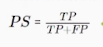

In [59]:
from sklearn.metrics import precision_score

In [62]:
# Modelo KNN
print(precision_score(y_teste, predito_knn))

0.7971552257266543


In [63]:
# Modelo Bernoulli de Naive Bayes
print(precision_score(y_teste, predito_BNb))

0.7129476584022039


In [64]:
# Modelo árvore de decisão
print(precision_score(y_teste, predito_ArvoreDecisao))

0.7973400886637112


# Recall

Calcula o quão bom o modelo está para classificar corretamente um resultado positivo. Bem parecido com a precisão porém possui essa sutileza na fórmula, o que modifica um pouco o resultado final 

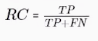

In [65]:
from sklearn.metrics import recall_score

In [66]:
# Modelo KNN
print(recall_score(y_teste, predito_knn))

0.8391927083333334


In [67]:
# Modelo Bernoulli de Naive Bayes
print(recall_score(y_teste, predito_BNb))

0.8424479166666666


In [68]:
# Modelo árvore de decisão
print(recall_score(y_teste, predito_ArvoreDecisao))

0.8196614583333334


# F1-Score

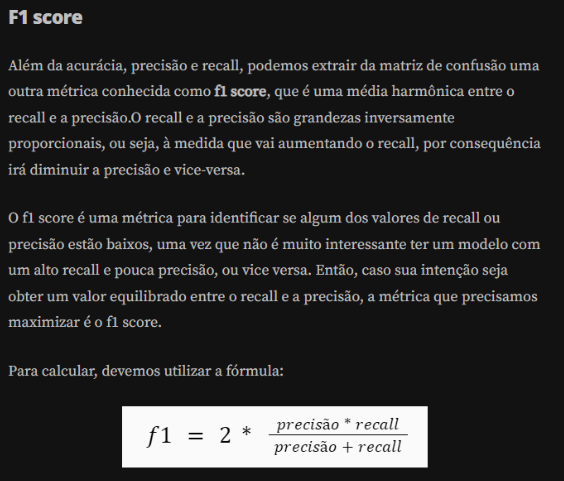

In [76]:
from sklearn.metrics import f1_score

# Modelo KNN
print(f1_score(y_teste, predito_knn))

# Modelo Bernoulli de Naive Bayes
print(f1_score(y_teste, predito_BNb))

# Modelo árvore de decisão
print(f1_score(y_teste, predito_ArvoreDecisao))

0.8176339993656835
0.7723067740972843
0.808346709470305


Quanto mais perto de 1, melhor